In [12]:
import requests
import lxml.html
from ckonlpy.tag import Twitter
#from konlpy.tag import Twitter
from sklearn.feature_extraction.text import CountVectorizer
import numpy
import operator
from matplotlib import pyplot
from wordcloud import WordCloud

tagger=Twitter()
tagger.add_dictionary('경쟁전', 'Noun')
tagger.add_dictionary('메르시','Noun')

In [8]:
def get_search(search):
    content2=[]
    url='https://kr.battle.net/forums/ko/overwatch/search?forum=5018707&q={}&sort=time&dir=d&page='.format(search)
    for page in range(1,100):
        res3=requests.get(url+str(page))
        root3=lxml.html.fromstring(res3.text)
        cnt1=root3.cssselect('div.Post-body.Post-body--topicTitle')
        cnt2=root3.cssselect('div.Post-body--postContent')
        for i in range(0,len(cnt1)):
            content2.append(cnt1[i].text_content())
            content2.append(cnt2[i].text_content())
    return content2

In [9]:
def get_noun(text):
    nouns = tagger.nouns(text)
    return [n for n in nouns if len(n) > 1]

In [10]:
def get_cloud(search):
    content2=get_search(search)
    cv=CountVectorizer(tokenizer=get_noun,max_features=100)
    tdm=cv.fit_transform(content2)
    words=cv.get_feature_names()
    count_mat=tdm.sum(axis=0)
    count=numpy.squeeze(numpy.asarray(count_mat))
    word_count=list(zip(words,count))
    word_count=sorted(word_count,key=operator.itemgetter(1),reverse=True)
    print(word_count)
    wc =WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
    cloud = wc.fit_words(dict(word_count))
    pyplot.figure(figsize=(12, 9))
    pyplot.imshow(cloud)
    pyplot.axis("off")
    pyplot.show()

[('환불', 2013), ('게임', 794), ('서버', 471), ('워치', 418), ('오버', 409), ('블리자드', 326), ('진짜', 263), ('점수', 238), ('경쟁전', 234), ('그냥', 216), ('유저', 213), ('구매', 208), ('문제', 192), ('관리', 185), ('보상', 157), ('사람', 140), ('문의', 138), ('시간', 119), ('요청', 111), ('황금', 111), ('복구', 109), ('생각', 108), ('무기', 107), ('운영', 106), ('너무', 99), ('탈주', 99), ('계속', 96), ('지금', 95), ('때문', 94), ('고객', 92), ('계정', 88), ('플레이', 85), ('스킨', 84), ('처리', 84), ('경쟁', 78), ('접속', 77), ('한번', 76), ('서비스', 75), ('다시', 74), ('해도', 74), ('경우', 72), ('오리진', 72), ('오류', 71), ('결제', 70), ('정지', 69), ('제발', 68), ('까지', 67), ('10', 66), ('정말', 66), ('답변', 65), ('버그', 65), ('트롤', 65), ('해주', 62), ('제대로', 59), ('하나', 58), ('이건', 55), ('대한', 54), ('우리', 53), ('포인트', 53), ('인용', 52), ('마음', 50), ('무슨', 50), ('신고', 50), ('신청', 49), ('정도', 49), ('관련', 48), ('상황', 48), ('이번', 48), ('현상', 48), ('소비자', 47), ('여기', 47), ('이용', 47), ('다른', 46), ('이상', 46), ('시스템', 45), ('이나', 45), ('짜증', 44), ('하루', 44), ('구입', 43), ('무료', 43), ('바로

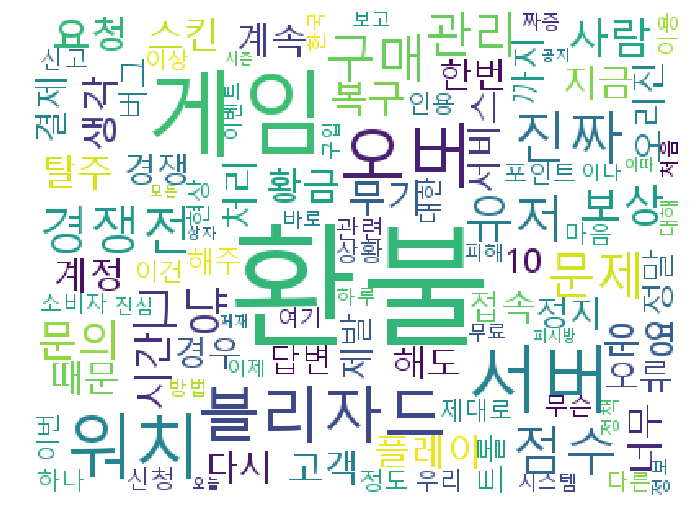

In [245]:
get_cloud('환불')

[('메르시', 2654), ('메르', 1043), ('부활', 1014), ('너프', 904), ('유저', 727), ('패치', 719), ('힐러', 539), ('발키리', 438), ('딜러', 427), ('궁극', 350), ('시가', 348), ('가속도', 332), ('그냥', 312), ('10', 311), ('리메이크', 308), ('겐지', 285), ('루시우', 278), ('게임', 274), ('지금', 262), ('영웅', 251), ('생각', 239), ('너무', 236), ('워치', 234), ('사기', 233), ('진짜', 232), ('이번', 221), ('생존', 212), ('수호천사', 193), ('다른', 190), ('사람', 180), ('이제', 177), ('2017', 172), ('작성자', 172), ('인용', 169), ('버스', 167), ('오버', 165), ('정도', 162), ('때문', 159), ('정말', 158), ('시간', 157), ('스킬', 156), ('가속', 154), ('쿨타임', 150), ('하나', 149), ('초기', 147), ('30', 146), ('하향', 146), ('다시', 142), ('카운터', 142), ('플레이', 142), ('리퍼', 140), ('소리', 136), ('캐릭터', 135), ('탱커', 128), ('실력', 120), ('문제', 119), ('삭제', 118), ('블리자드', 117), ('아군', 117), ('메타', 115), ('시즌', 113), ('상황', 110), ('서버', 110), ('상대', 109), ('디바', 107), ('버프', 107), ('이유', 106), ('픽률', 104), ('공격', 99), ('다인', 98), ('까지', 97), ('현재', 96), ('돌진', 94), ('버그', 94), ('이상', 93), ('티어', 90),

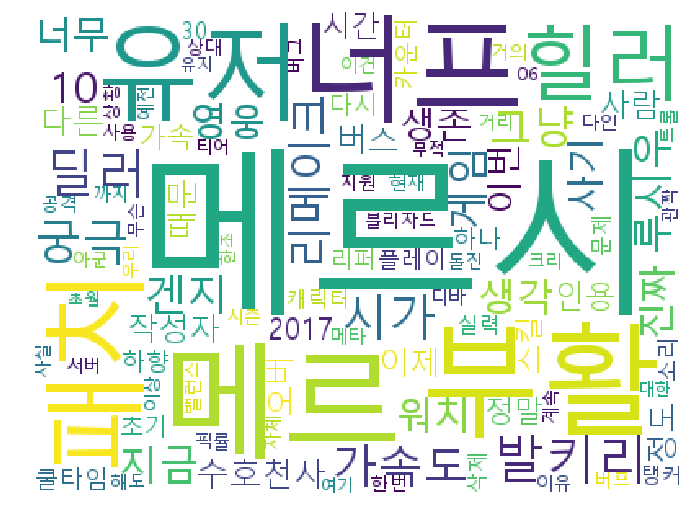

In [209]:
get_cloud('메르시')

[('겐지', 2873), ('너프', 875), ('디바', 458), ('영웅', 435), ('사기', 395), ('메르시', 392), ('게임', 360), ('패치', 342), ('유저', 328), ('워치', 315), ('윈스턴', 313), ('질풍', 311), ('오버', 308), ('힐러', 307), ('궁극', 299), ('스킨', 298), ('공격', 266), ('스킬', 265), ('부활', 234), ('딜러', 231), ('생각', 216), ('시간', 209), ('메르', 206), ('카운터', 206), ('레이서', 204), ('너무', 200), ('그냥', 194), ('다른', 192), ('정도', 191), ('가능', 185), ('용검', 185), ('하나', 183), ('진짜', 181), ('데미지', 175), ('초기', 175), ('경우', 173), ('튕겨', 171), ('한조', 170), ('밸런스', 168), ('크리', 165), ('내기', 164), ('문제', 164), ('때문', 163), ('매트릭스', 156), ('사람', 156), ('캐릭터', 156), ('겐트', 151), ('리퍼', 146), ('지금', 146), ('2017', 145), ('메타', 145), ('인용', 143), ('돌진', 141), ('작성자', 140), ('캐릭', 140), ('트레', 135), ('오니', 125), ('쿨타임', 125), ('10', 124), ('실력', 124), ('우선', 124), ('파라', 124), ('모든', 122), ('선택', 122), ('상향', 119), ('브라', 118), ('치가', 116), ('탱커', 115), ('루시우', 114), ('상황', 114), ('이상', 113), ('점프', 113), ('플레이', 113), ('버그', 110), ('상대', 109), ('기본', 1

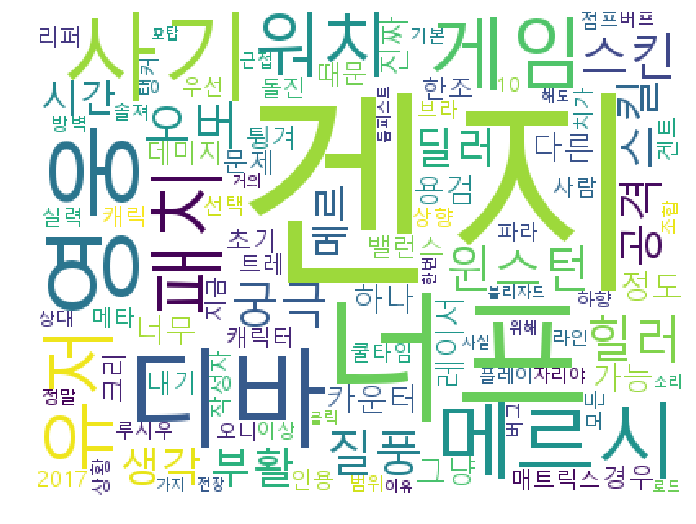

In [246]:
get_cloud('겐지')

[('파라', 1931), ('겐지', 570), ('영웅', 495), ('너프', 459), ('리퍼', 451), ('디바', 421), ('크리', 368), ('공격', 354), ('메르시', 348), ('시간', 323), ('데미지', 316), ('솔져', 287), ('게임', 266), ('상향', 257), ('카운터', 253), ('궁극', 252), ('파르시', 251), ('생각', 247), ('메르', 245), ('정도', 245), ('너무', 240), ('유저', 239), ('윈스턴', 229), ('패치', 228), ('한조', 215), ('호그', 214), ('로드', 207), ('도우', 204), ('가능', 200), ('하나', 198), ('워치', 197), ('루시우', 195), ('다른', 194), ('경우', 191), ('딜러', 191), ('캐릭터', 190), ('그냥', 189), ('스킬', 185), ('솔저', 184), ('오버', 183), ('라인', 180), ('플레이', 177), ('진짜', 173), ('레이서', 172), ('바스', 165), ('밸런스', 163), ('방벽', 159), ('상대', 158), ('힐러', 158), ('때문', 151), ('브라', 150), ('메이', 144), ('사람', 144), ('버프', 137), ('사기', 137), ('스킨', 135), ('선택', 134), ('아군', 133), ('자리야', 132), ('10', 131), ('지금', 130), ('문제', 128), ('정크랫', 119), ('상황', 118), ('한번', 118), ('모든', 117), ('탱커', 117), ('티온', 115), ('작성자', 113), ('인용', 111), ('매트릭스', 107), ('생존', 106), ('시즌', 106), ('토르', 106), ('수비', 104), ('캐릭', 1

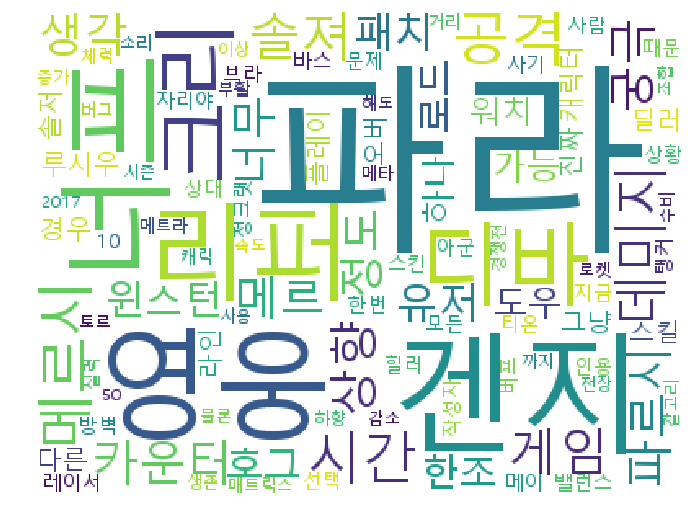

In [247]:
get_cloud('파라')

[('디바', 2156), ('겐지', 931), ('너프', 822), ('매트릭스', 558), ('윈스턴', 531), ('패치', 489), ('유저', 467), ('영웅', 420), ('게임', 405), ('메르시', 401), ('리퍼', 369), ('워치', 345), ('돌진', 331), ('오버', 328), ('메타', 327), ('공격', 290), ('딜러', 288), ('호그', 286), ('로드', 270), ('힐러', 269), ('시간', 265), ('메르', 254), ('조합', 249), ('생각', 246), ('때문', 239), ('너무', 238), ('사기', 235), ('탱커', 235), ('지금', 223), ('방벽', 220), ('진짜', 212), ('겐트', 209), ('정도', 207), ('그냥', 206), ('궁극', 204), ('크리', 204), ('부활', 200), ('카운터', 199), ('자리야', 194), ('스킬', 187), ('사람', 186), ('밸런스', 185), ('라인', 183), ('플레이', 182), ('문제', 179), ('하나', 179), ('데미지', 164), ('다른', 161), ('경우', 151), ('레이서', 150), ('2017', 147), ('작성자', 147), ('파라', 147), ('이번', 145), ('인용', 145), ('루시우', 140), ('이상', 136), ('시즌', 135), ('캐릭터', 132), ('버프', 130), ('이유', 129), ('이제', 126), ('10', 124), ('상향', 124), ('트릭', 123), ('내기', 118), ('범위', 117), ('튕겨', 117), ('상대', 116), ('블리자드', 113), ('사용', 111), ('상황', 111), ('솔맥', 111), ('소리', 109), ('가능', 105), ('한조',

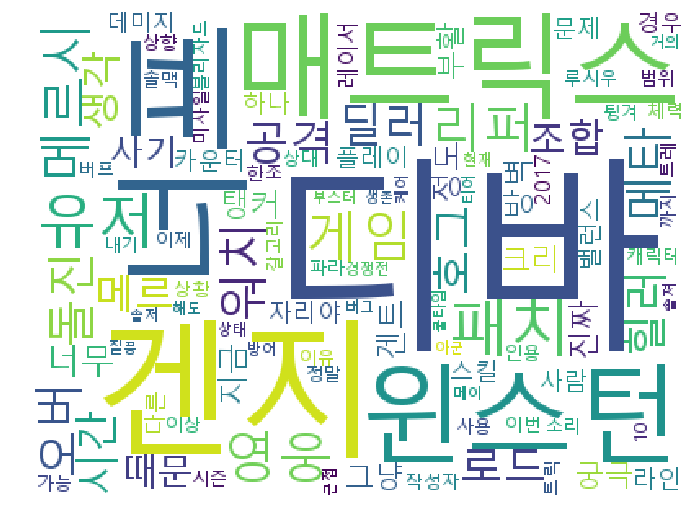

In [248]:
get_cloud('디바')

[('정크렛', 667), ('너프', 231), ('영웅', 222), ('겐지', 219), ('게임', 195), ('공격', 162), ('디바', 155), ('한조', 149), ('리퍼', 145), ('캐릭터', 132), ('레이서', 125), ('너무', 124), ('데미지', 122), ('메이', 116), ('크리', 115), ('유저', 113), ('메르시', 112), ('시간', 111), ('워치', 111), ('오버', 108), ('패치', 102), ('생각', 100), ('로드', 98), ('파라', 97), ('버그', 94), ('정도', 94), ('상향', 92), ('사람', 90), ('도우', 87), ('다른', 86), ('수비', 85), ('지뢰', 85), ('플레이', 83), ('호그', 80), ('성우', 79), ('카운터', 78), ('궁극', 77), ('경우', 73), ('바스', 73), ('사기', 72), ('타이어', 70), ('루시우', 69), ('부활', 69), ('토르', 67), ('스킬', 66), ('하나', 66), ('문제', 64), ('진짜', 64), ('버프', 63), ('그냥', 62), ('메르', 62), ('티온', 60), ('포탑', 60), ('아군', 59), ('자기', 56), ('지금', 56), ('폭탄', 56), ('10', 55), ('경쟁전', 55), ('이번', 54), ('하이라이트', 54), ('상대', 53), ('윈스턴', 53), ('스킨', 52), ('캐릭', 52), ('정말', 51), ('20', 50), ('때문', 50), ('밸런스', 50), ('속도', 50), ('이제', 49), ('블리자드', 48), ('사용', 48), ('체력', 48), ('소리', 47), ('딜러', 46), ('메트라', 46), ('자리야', 45), ('상황', 44), ('쿨타임', 44

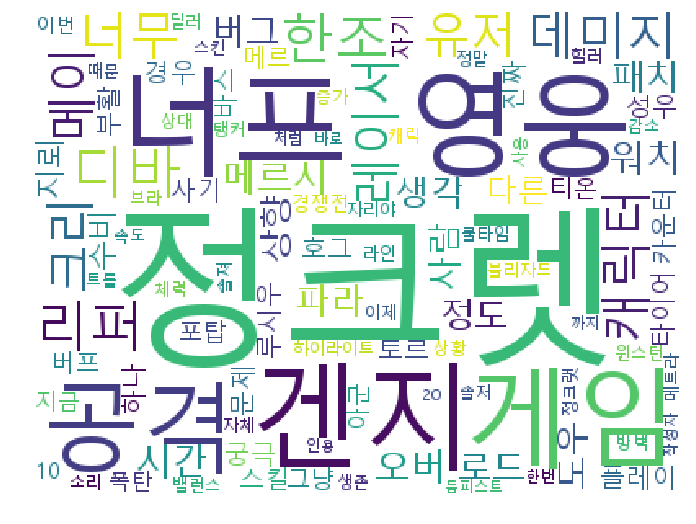

In [249]:
get_cloud('정크렛')

[('한조', 1909), ('게임', 698), ('영웅', 478), ('사람', 430), ('겐지', 413), ('트롤', 394), ('워치', 386), ('오버', 383), ('유저', 376), ('도우', 336), ('경쟁전', 249), ('진짜', 248), ('딜러', 219), ('시간', 211), ('화살', 199), ('너프', 198), ('힐러', 197), ('그냥', 196), ('공격', 191), ('생각', 191), ('문제', 188), ('메르시', 178), ('정도', 177), ('신고', 174), ('점수', 172), ('플레이', 172), ('너무', 168), ('디바', 168), ('캐릭터', 168), ('리퍼', 164), ('패작', 163), ('패치', 160), ('시즌', 153), ('수비', 151), ('때문', 150), ('블리자드', 149), ('경우', 148), ('선택', 147), ('가능', 144), ('제발', 144), ('다른', 142), ('궁극', 138), ('정말', 138), ('조합', 135), ('크리', 134), ('하나', 134), ('토르', 133), ('경쟁', 130), ('데미지', 122), ('실력', 122), ('캐릭', 120), ('10', 119), ('상향', 118), ('메이', 116), ('브라', 115), ('지금', 113), ('바스', 109), ('상황', 109), ('한번', 109), ('스킬', 108), ('위도', 108), ('메르', 107), ('호그', 107), ('사기', 105), ('이유', 105), ('삭제', 103), ('우리', 103), ('탱커', 102), ('로드', 101), ('모든', 101), ('파라', 100), ('매칭', 98), ('계속', 97), ('소리', 97), ('밸런스', 96), ('이상', 95), ('해도', 

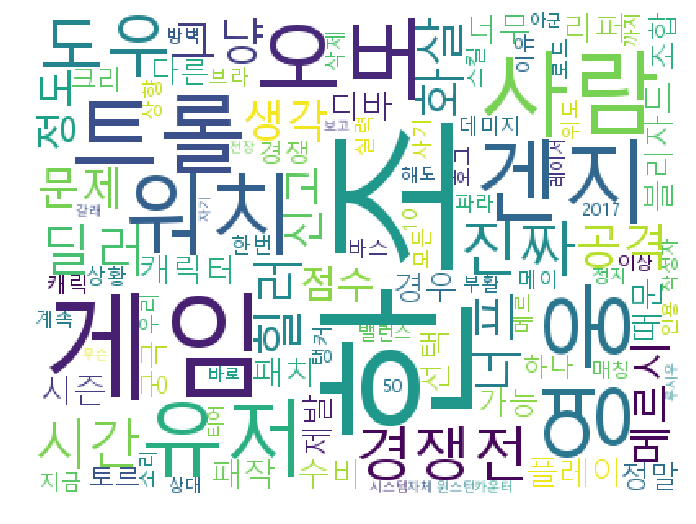

In [250]:
get_cloud('한조')

[('위도우', 1191), ('한조', 738), ('게임', 699), ('도우', 411), ('사람', 404), ('트롤', 397), ('유저', 391), ('겐지', 373), ('워치', 366), ('오버', 350), ('영웅', 336), ('진짜', 254), ('너무', 250), ('캐릭', 250), ('파라', 245), ('그냥', 239), ('상향', 237), ('문제', 236), ('데미지', 227), ('디바', 227), ('생각', 226), ('메르시', 220), ('공격', 217), ('하나', 214), ('시간', 212), ('정도', 206), ('스킨', 202), ('경쟁전', 201), ('때문', 200), ('크리', 195), ('다른', 193), ('힐러', 191), ('저격', 190), ('너프', 189), ('딜러', 179), ('패치', 177), ('윈스턴', 172), ('리퍼', 169), ('플레이', 168), ('스킬', 158), ('브라', 152), ('갈고리', 151), ('탱커', 151), ('점수', 146), ('토르', 146), ('호그', 146), ('하향', 144), ('로드', 141), ('캐릭터', 141), ('지금', 140), ('블리자드', 139), ('상대', 135), ('까지', 134), ('상황', 134), ('신고', 134), ('해도', 134), ('정말', 131), ('경우', 129), ('메이커', 129), ('시즌', 127), ('실력', 127), ('메르', 126), ('솔져', 125), ('조합', 121), ('궁극', 118), ('사기', 118), ('버그', 113), ('한번', 111), ('12', 110), ('무슨', 109), ('작성자', 108), ('제발', 108), ('인용', 107), ('10', 106), ('레이서', 106), ('이상', 104

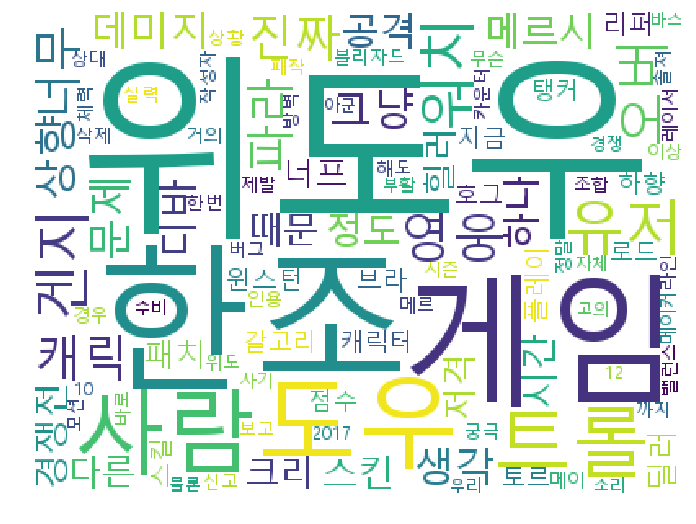

In [258]:
tagger.add_dictionary('위도우','Noun')
get_cloud('위도우')

[('트레', 678), ('겐지', 462), ('너프', 302), ('영웅', 210), ('디바', 181), ('크리', 178), ('리퍼', 176), ('게임', 156), ('힐러', 148), ('딜러', 147), ('레이서', 143), ('메르시', 142), ('유저', 138), ('한조', 134), ('그냥', 127), ('시간', 127), ('사람', 119), ('윈스턴', 119), ('카운터', 118), ('파라', 118), ('솔져', 108), ('생각', 107), ('상향', 104), ('로드', 100), ('때문', 97), ('패치', 97), ('사기', 95), ('진짜', 95), ('다른', 93), ('정도', 90), ('공격', 88), ('호그', 87), ('라인', 86), ('오버', 85), ('워치', 85), ('지금', 85), ('루시우', 83), ('너무', 81), ('메르', 81), ('상대', 79), ('데미지', 78), ('메타', 76), ('스킬', 76), ('인용', 75), ('작성자', 74), ('하나', 73), ('캐릭', 68), ('10', 67), ('상황', 67), ('조합', 67), ('탱커', 67), ('도우', 65), ('자리야', 63), ('2017', 62), ('밸런스', 62), ('부활', 62), ('실력', 60), ('메이', 59), ('방벽', 59), ('블리자드', 59), ('경우', 58), ('문제', 58), ('체력', 58), ('겐트', 56), ('플레이', 56), ('까지', 55), ('트롤', 55), ('솔저', 54), ('돌진', 53), ('버프', 53), ('거의', 52), ('캐릭터', 52), ('소리', 51), ('이상', 51), ('점멸', 51), ('근접', 50), ('이유', 50), ('20', 49), ('경쟁전', 49), ('200', 46)

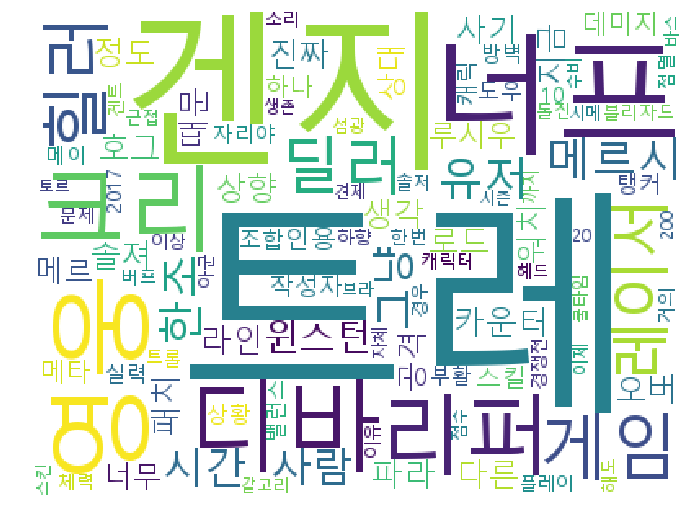

In [254]:
get_cloud('트레')

[('자리야', 1360), ('디바', 699), ('겐지', 642), ('방벽', 472), ('영웅', 467), ('호그', 466), ('너프', 447), ('로드', 410), ('윈스턴', 380), ('유저', 333), ('라인', 312), ('시간', 310), ('리퍼', 305), ('게임', 298), ('딜러', 281), ('공격', 277), ('힐러', 275), ('탱커', 273), ('궁극', 272), ('워치', 262), ('패치', 258), ('오버', 245), ('메르시', 240), ('루시우', 220), ('한조', 213), ('정도', 207), ('데미지', 204), ('메이', 202), ('생각', 200), ('가능', 197), ('크리', 197), ('상향', 191), ('브라', 189), ('스킬', 189), ('갈고리', 185), ('너무', 183), ('조합', 181), ('돌진', 171), ('사람', 171), ('경우', 170), ('매트릭스', 170), ('카운터', 169), ('사기', 168), ('메르', 167), ('다른', 166), ('캐릭터', 166), ('지금', 162), ('하나', 161), ('플레이', 160), ('때문', 157), ('버그', 157), ('상대', 156), ('그냥', 155), ('아군', 154), ('라인하르트', 150), ('체력', 145), ('점수', 143), ('시즌', 141), ('진짜', 140), ('파라', 140), ('문제', 139), ('스킨', 139), ('상황', 138), ('솔져', 135), ('메타', 133), ('버프', 130), ('10', 125), ('까지', 125), ('모든', 123), ('선택', 121), ('경쟁전', 120), ('레이서', 119), ('작성자', 118), ('부활', 117), ('인용', 114), ('원콤',

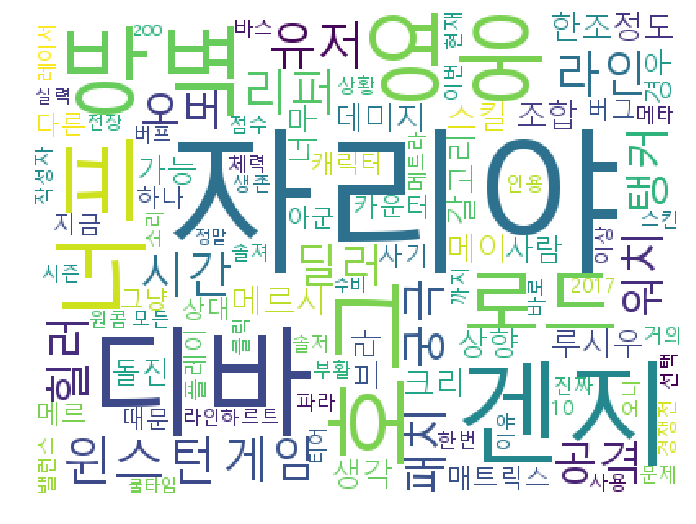

In [260]:
get_cloud('자리야')

[('아나', 1338), ('메르시', 682), ('힐러', 562), ('겐지', 480), ('너프', 480), ('영웅', 476), ('게임', 448), ('메르', 433), ('루시우', 413), ('유저', 401), ('딜러', 376), ('디바', 371), ('워치', 339), ('패치', 303), ('사람', 296), ('오버', 286), ('수면', 264), ('윈스턴', 257), ('리퍼', 253), ('생각', 230), ('다른', 225), ('때문', 224), ('너무', 222), ('부활', 213), ('그냥', 207), ('공격', 205), ('플레이', 205), ('시간', 204), ('조합', 197), ('진짜', 197), ('궁극', 196), ('경우', 192), ('탱커', 191), ('호그', 190), ('지금', 186), ('문제', 185), ('점수', 184), ('하나', 183), ('10', 171), ('파라', 168), ('정도', 164), ('상대', 162), ('데미지', 161), ('작성자', 160), ('시즌', 159), ('인용', 159), ('2017', 157), ('크리', 157), ('지원', 156), ('캐릭터', 155), ('사기', 153), ('로드', 150), ('성우', 147), ('가능', 145), ('카운터', 143), ('메타', 140), ('스킬', 140), ('경쟁전', 137), ('밸런스', 137), ('상향', 135), ('상황', 132), ('선택', 130), ('한조', 128), ('돌진', 126), ('아군', 124), ('이번', 123), ('시가', 116), ('솔져', 114), ('거의', 112), ('소리', 111), ('수류탄', 110), ('스킨', 110), ('라인', 109), ('방벽', 108), ('레이서', 107), ('생존', 10

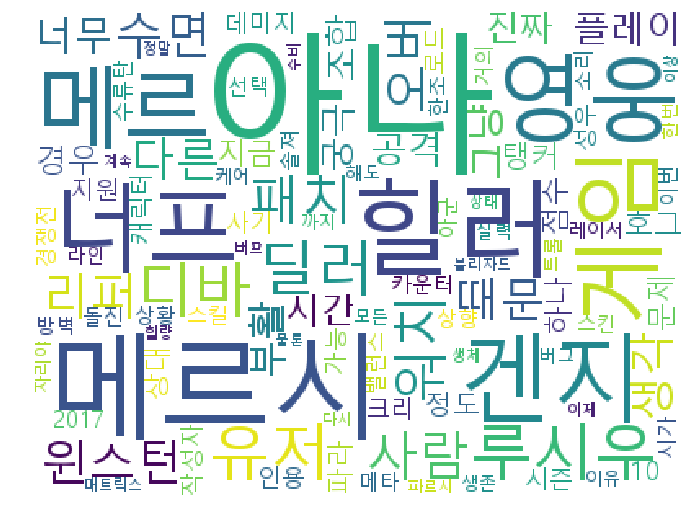

In [264]:
tagger.add_dictionary('아나','Noun')
get_cloud('아나')

[('메이', 1884), ('버그', 517), ('게임', 395), ('영웅', 386), ('겐지', 303), ('스킨', 289), ('공격', 288), ('유저', 288), ('디바', 269), ('패치', 264), ('제발', 259), ('궁극', 251), ('로드', 246), ('호그', 238), ('시간', 233), ('리퍼', 229), ('너프', 223), ('빙벽', 202), ('오버', 201), ('방벽', 200), ('워치', 194), ('플레이', 188), ('트롤', 187), ('한조', 184), ('메트라', 177), ('가능', 173), ('경우', 169), ('너무', 165), ('사람', 165), ('다른', 160), ('캐릭터', 153), ('정도', 152), ('윈스턴', 151), ('문제', 145), ('수비', 145), ('선택', 144), ('때문', 140), ('자리야', 139), ('그냥', 132), ('블리자드', 131), ('진짜', 131), ('클릭', 131), ('파라', 129), ('크리', 128), ('카운터', 125), ('빙결', 124), ('생각', 123), ('하나', 123), ('브라', 120), ('스킬', 119), ('갈고리', 117), ('바스', 117), ('토르', 115), ('레이서', 112), ('급속', 111), ('지금', 109), ('아군', 108), ('10', 107), ('데미지', 107), ('슬로우', 106), ('상향', 105), ('경쟁전', 103), ('딜러', 102), ('바로', 102), ('루시우', 101), ('밸런스', 99), ('쿨타임', 99), ('티온', 96), ('모든', 94), ('신고', 92), ('상대', 91), ('시메', 91), ('감소', 90), ('메르시', 90), ('사용', 90), ('원콤', 90), ('탱커

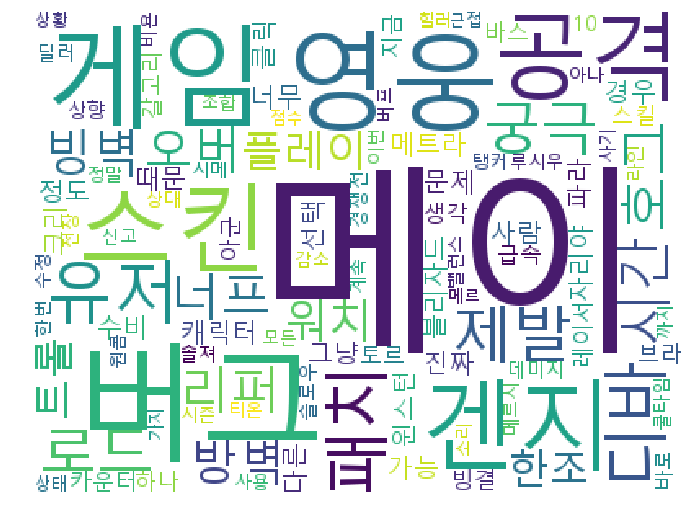

In [265]:
get_cloud('메이')

[('라인', 1679), ('방벽', 600), ('디바', 586), ('겐지', 371), ('영웅', 356), ('너프', 348), ('딜러', 344), ('호그', 316), ('리퍼', 299), ('유저', 286), ('윈스턴', 271), ('힐러', 271), ('돌진', 270), ('자리야', 270), ('탱커', 267), ('라인하르트', 266), ('로드', 264), ('상향', 263), ('패치', 239), ('게임', 236), ('공격', 230), ('너무', 227), ('그냥', 222), ('메르시', 208), ('시간', 208), ('루시우', 206), ('아나', 196), ('한조', 196), ('정도', 187), ('사람', 185), ('점수', 185), ('경우', 179), ('진짜', 179), ('바스', 176), ('생각', 176), ('문제', 174), ('스킬', 173), ('지금', 171), ('인용', 164), ('브라', 163), ('작성자', 163), ('상대', 161), ('체력', 161), ('솔져', 159), ('시즌', 159), ('경쟁전', 158), ('데미지', 155), ('워치', 153), ('하나', 153), ('메타', 152), ('때문', 146), ('메르', 145), ('다른', 138), ('방패', 138), ('갈고리', 135), ('오버', 132), ('조합', 132), ('궁극', 131), ('사기', 128), ('크리', 128), ('플레이', 122), ('파라', 118), ('10', 117), ('매트릭스', 117), ('2017', 114), ('버프', 113), ('거의', 112), ('상황', 111), ('까지', 108), ('실력', 107), ('한번', 107), ('버그', 106), ('메이', 105), ('아군', 103), ('캐릭터', 103), ('정말',

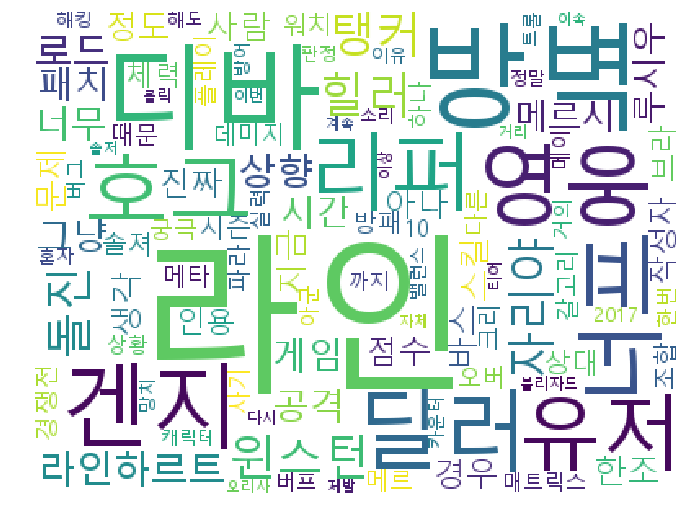

In [267]:
get_cloud('라인')